# Project 6

Multiclass classifier iris dataset

# Step 1

Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn, optim
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix

# Step 2

Database

In [ ]:
np.random.seed(123)
torch.manual_seed(123)

In [ ]:
df = pd.read_csv("/content/iris.csv")

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


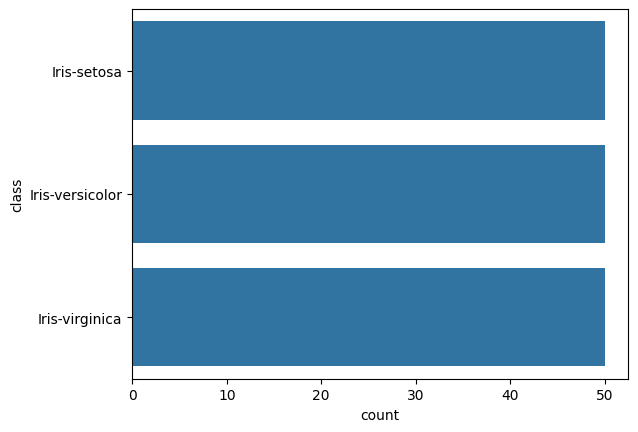

In [ ]:
sns.countplot(df['class']);

In [ ]:
forecasters = df.iloc[:, 0:4].values
labels = df.iloc[:, 4].values

In [ ]:
forecasters.shape

(150, 4)

In [ ]:
labels.shape

(150,)

In [ ]:
np.unique(df['class'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

In [ ]:
np.unique(labels)

array([0, 1, 2])

In [ ]:
forecasters_train, forecasters_test, label_train, label_test = train_test_split(forecasters, labels, test_size = 0.25)

In [ ]:
forecasters_train = torch.tensor(forecasters_train, dtype=torch.float)
label_train = torch.tensor(label_train, dtype=torch.float)

# Step 3

Model building

In [ ]:
# 4 input -> 4 neuron hidden layer -> 4 neuron hidden layer -> 3 output
# 4 atribute, 3 possible output

# hidden layer = (input + output) / 2


classifier = nn.Sequential(
    nn.Linear(4, 4),
    nn.ReLU(),

    nn.Linear(4, 4),
    nn.ReLU(),

    nn.Linear(4,3)
)

In [ ]:
criterion = nn.CrossEntropyLoss() # multiple classification problem is recommended

optimizer = optim.Adam(
    classifier.parameters(),
    lr=0.001,
    weight_decay=0.0001
)

In [ ]:
dataset = torch.utils.data.TensorDataset(
    forecasters_train,
    label_train
)

train_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size = 10,
    shuffle=True
)

# Step 4

Model train

In [ ]:
for epoch in range(1000):
  running_loss = 0.
  running_accuracy = 0.

  for data in train_loader:
    inputs, label = data

    optimizer.zero_grad()

    outputs = classifier.forward(inputs)
    loss = criterion(outputs, label.long())

    loss.backward()

    outputs = F.softmax(outputs, dim=1)
    top_p, top_class = torch.topk(outputs, k=1, dim=1) # k = 1 mean biggest value, dim = 1 mean first dim

    equals = top_class == label.view(*top_class.shape)

    running_accuracy += torch.mean(equals.type(torch.float))

    optimizer.step()

    running_loss += loss.item()

  print("Epoch: %3d: Loss: %.5f - Accuracy %.5f" % (epoch + 1, running_loss/(len(train_loader)), running_accuracy/len(train_loader)))


Epoch:   1: Loss: 1.09572 - Accuracy 0.38333
Epoch:   2: Loss: 1.10072 - Accuracy 0.35000
Epoch:   3: Loss: 1.09563 - Accuracy 0.38333
Epoch:   4: Loss: 1.09541 - Accuracy 0.38333
Epoch:   5: Loss: 1.09658 - Accuracy 0.35000
Epoch:   6: Loss: 1.09640 - Accuracy 0.35000
Epoch:   7: Loss: 1.09117 - Accuracy 0.38333
Epoch:   8: Loss: 1.09123 - Accuracy 0.38333
Epoch:   9: Loss: 1.10040 - Accuracy 0.35000
Epoch:  10: Loss: 1.08639 - Accuracy 0.41667
Epoch:  11: Loss: 1.09122 - Accuracy 0.38333
Epoch:  12: Loss: 1.09542 - Accuracy 0.38333
Epoch:  13: Loss: 1.09132 - Accuracy 0.38333
Epoch:  14: Loss: 1.10033 - Accuracy 0.35000
Epoch:  15: Loss: 1.08629 - Accuracy 0.41667
Epoch:  16: Loss: 1.09530 - Accuracy 0.38333
Epoch:  17: Loss: 1.09129 - Accuracy 0.38333
Epoch:  18: Loss: 1.09524 - Accuracy 0.38333
Epoch:  19: Loss: 1.08614 - Accuracy 0.41667
Epoch:  20: Loss: 1.10031 - Accuracy 0.35000
Epoch:  21: Loss: 1.09505 - Accuracy 0.38333
Epoch:  22: Loss: 1.08608 - Accuracy 0.41667
Epoch:  23

# Step 5

Model evaluation

In [ ]:
classifier.eval()

Sequential(
  (0): Linear(in_features=4, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
)

In [ ]:
forecasters_test = torch.tensor(forecasters_test, dtype=torch.float)

In [ ]:
forecasting = classifier(forecasters_test)

In [ ]:
forecasting

tensor([[-1.2803e+01,  1.2912e+00,  5.2890e-01],
        [-1.6946e+01, -1.4646e+00,  4.4914e+00],
        [-1.7956e+01, -2.5842e+00,  5.9640e+00],
        [-7.2939e+00,  4.0094e+00, -3.8358e+00],
        [ 1.0052e+01,  1.3518e-02, -4.9928e+00],
        [-1.2770e+01,  1.0390e+00,  8.0175e-01],
        [-1.0198e+01,  3.3620e+00, -2.3455e+00],
        [ 1.0370e+01, -1.7057e-01, -4.8205e+00],
        [ 9.1001e+00,  7.9016e-02, -4.6608e+00],
        [-9.1673e+00,  3.4804e+00, -2.6935e+00],
        [-1.6071e+01, -7.9239e-01,  3.5485e+00],
        [ 1.3285e+01, -4.5413e-01, -5.6926e+00],
        [-8.0703e+00,  3.7604e+00, -3.2416e+00],
        [-1.5423e+01, -3.1906e-01,  2.8869e+00],
        [-2.0088e+01, -2.8822e+00,  6.7432e+00],
        [-1.8329e+01, -2.6501e+00,  6.1159e+00],
        [ 1.1751e+01, -2.0867e-01, -5.4017e+00],
        [ 1.1009e+01, -3.5388e-01, -4.8005e+00],
        [-1.0373e+01,  3.4514e+00, -2.4107e+00],
        [ 9.0212e+00,  1.8256e-01, -4.8045e+00],
        [ 1.0909e+01

In [ ]:
F.softmax(forecasting)

<ipython-input-44-612fa4d87cf2>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(forecasting)


tensor([[5.1602e-07, 6.8186e-01, 3.1814e-01],
        [4.8809e-10, 2.5836e-03, 9.9742e-01],
        [4.0872e-11, 1.9387e-04, 9.9981e-01],
        [1.2328e-05, 9.9960e-01, 3.9148e-04],
        [9.9996e-01, 4.3694e-05, 2.9256e-07],
        [5.6240e-07, 5.5905e-01, 4.4095e-01],
        [1.2867e-06, 9.9669e-01, 3.3097e-03],
        [9.9997e-01, 2.6448e-05, 2.5290e-07],
        [9.9988e-01, 1.2082e-04, 1.0561e-06],
        [3.2081e-06, 9.9792e-01, 2.0787e-03],
        [2.9756e-09, 1.2858e-02, 9.8714e-01],
        [1.0000e+00, 1.0798e-06, 5.7317e-09],
        [7.2710e-06, 9.9908e-01, 9.0919e-04],
        [1.0733e-08, 3.8943e-02, 9.6106e-01],
        [2.2241e-12, 6.6028e-05, 9.9993e-01],
        [2.4201e-11, 1.5592e-04, 9.9984e-01],
        [9.9999e-01, 6.3990e-06, 3.5548e-08],
        [9.9999e-01, 1.1618e-05, 1.3614e-07],
        [9.8791e-07, 9.9716e-01, 2.8374e-03],
        [9.9985e-01, 1.4500e-04, 9.8973e-07],
        [9.9998e-01, 1.6679e-05, 9.9819e-08],
        [4.5300e-07, 8.1710e-01, 1

In [ ]:
forecasting = [np.argmax(t) for t in forecasting.detach().numpy()]

In [ ]:
forecasting

[1,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 0]

In [ ]:
matrix = confusion_matrix(forecasting, label_test)
matrix

array([[16,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 12]])

<Axes: >

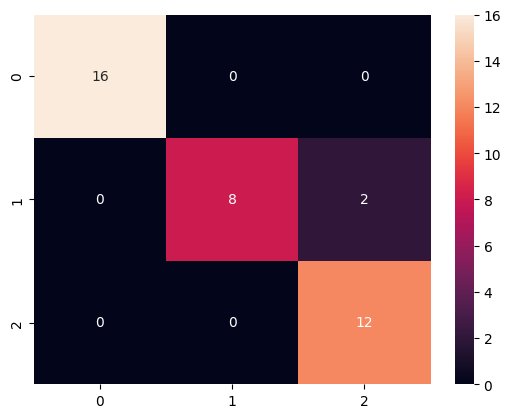

In [ ]:
sns.heatmap(matrix, annot=True)